In [11]:
import sys
print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [12]:
import os
os.chdir("C:/Users/MY/workspace/datascience/data_visualization")
!pip install JPype1-1.1.2-cp38-cp38-win_amd64.whl

Processing c:\users\my\workspace\datascience\data_visualization\jpype1-1.1.2-cp38-cp38-win_amd64.whl
  Attempting uninstall: JPype1
    Found existing installation: JPype1 1.2.1
    Uninstalling JPype1-1.2.1:
      Successfully uninstalled JPype1-1.2.1


In [13]:
!pip install konlpy

In [18]:
from konlpy.tag import Komoran
komoran = Komoran()
print(komoran.nouns('안녕하세요 만나서 반갑습니다'))

['안녕하세요', '반갑습니다']


In [21]:
from konlpy.tag import Komoran
import numpy as np

komoran = Komoran()
text = "오늘 날씨는 구름이 많아요"
nouns = komoran.nouns(text)
print(nouns)

dics = {}
for word in nouns:
    if word not in dics.keys():
        dics[word] = len(dics)
print(dics)
  
nb_classes = len(dics)
targets = list(dics.values())
one_hot_targets = np.eye


['오늘', '날씨', '구름']
{'오늘': 0, '날씨': 1, '구름': 2}


Epoch 1/10
2100/2100 [==============================] - 5s 2ms/step - loss: 0.7745 - accuracy: 0.7749 - val_loss: 0.3688 - val_accuracy: 0.8892
Epoch 2/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3527 - accuracy: 0.8984 - val_loss: 0.3111 - val_accuracy: 0.9088
Epoch 3/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3026 - accuracy: 0.9138 - val_loss: 0.2701 - val_accuracy: 0.9201
Epoch 4/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2713 - accuracy: 0.9230 - val_loss: 0.2510 - val_accuracy: 0.9274
Epoch 5/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2498 - accuracy: 0.9273 - val_loss: 0.2371 - val_accuracy: 0.9324
Epoch 6/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2280 - accuracy: 0.9344 - val_loss: 0.2196 - val_accuracy: 0.9375
Epoch 7/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2158 - accuracy: 0.9385 - val_loss: 0.2142 - val_accuracy:

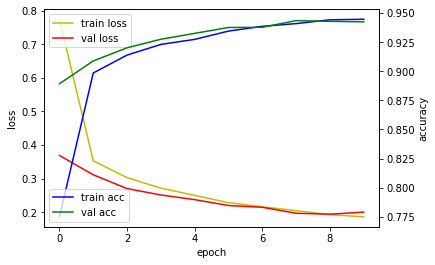

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test/255.0

ds = tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(10000)
train_size = int(len(x_train)*0.7) #학습셋:검증셋 비율
train_ds =ds.take(train_size).batch(20) #batch -> 학습시 샘플 수
val_ds = ds.skip(train_size).batch(20)

model = Sequential()
model.add(Flatten(input_shape=(28,28))) # 입력층 (2차원을 평면화)
model.add(Dense(20, activation = 'relu')) #은닉층
model.add(Dense(20, activation = 'relu')) #은닉층
model.add(Dense(10, activation = 'softmax')) #출력층 (숫자 0~9)

model.compile(loss='sparse_categorical_crossentropy', optimizer= 'sgd', metrics = ['accuracy'])

#모델학습
hist = model.fit(train_ds, validation_data= val_ds, epochs= 10)  #fit ->학습 ,epochs ->학습횟수
print('모델 평가')
model.evaluate(x_test, y_test) #evaluate -> 성능평가평가
model.summary()
model.save('mnist_model.h5')

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label = 'train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_10 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.2076 - accuracy: 0.0990


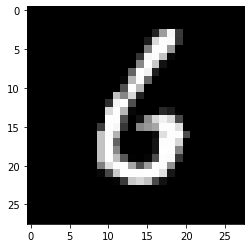

예측값
[6]


In [20]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

_, (x_test, y_test) = mnist.load_data()
x_test = x_test /255.0

model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test, verbose = 2)

plt.imshow(x_test[50], cmap= 'gray')
plt.show()

picks = [50]
predict = model.predict_classes(x_test[picks])
print('예측값')
print(predict)
